# Support Vector Machine

## Example problem - points scattered in 2D space

[0]


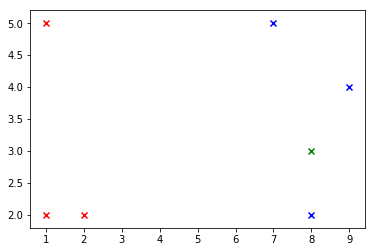

In [647]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]
classifier.fit(training_points, labels) 


plt.scatter([1,1,2],[2,5,2],marker="x",color="r") # label 1
 
plt.scatter([7,9,8],[5,4,2],marker="x",color="b") # label 0

#plt.scatter([3],[2],marker="x",color="g")
plt.scatter([8],[3],marker="x",color="g")





#print(classifier.predict([[3, 2]]))
print(classifier.predict([[8, 3]]))

(57, 57)
(58, 57)
Conditon number of A:  4.484915249179096e+18
alpha_max:  0.04945749157780147
W_hat:  [[-8.66723496  4.41641579  0.07379999]]
b_hat:  0.07379999480085375


Text(0.5, 1.0, 'Separate Data')

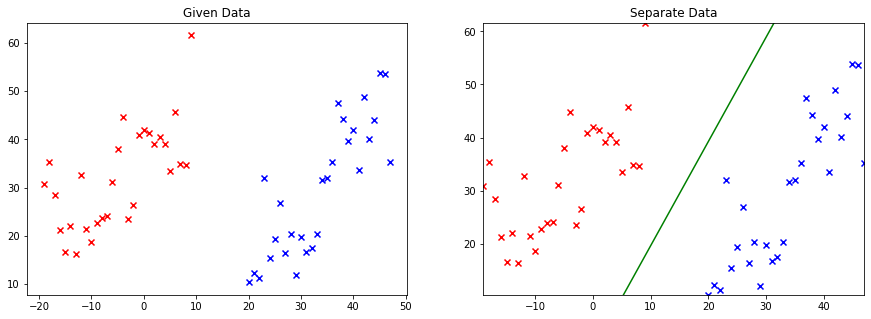

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#x = np.linspace(1,2,20)
#y = np.linspace(2,3,20)

x1 = np.arange(1,30,1) - 20
y1 = np.arange(6,35,1)
y1 = y1 + np.random.rand(np.size(y1))*30

x2 = np.arange(0,28,1) + 20
y2 = np.arange(1,29,1)
y2 = y2 + np.random.rand(np.size(y2))*30

#======================================================================

plt.figure(num=1,figsize=[15,5])
plt.subplot(121)
plt.scatter(x1,y1,marker="x",color="r")
plt.scatter(x2,y2,marker="x",color="b")
plt.title('Given Data')



X1 = np.concatenate((np.asmatrix(x1).T, np.asmatrix(y1).T, np.ones((np.size(x1,0),1))),axis=1)
X2 = np.concatenate((np.asmatrix(x2).T, np.asmatrix(y2).T, np.ones((np.size(x2,0),1))),axis=1)
#X1 = np.concatenate((np.asmatrix(x1).T, np.asmatrix(y1).T),axis=1)
#X2 = np.concatenate((np.asmatrix(x2).T, np.asmatrix(y2).T),axis=1)

#print(X1)

X = np.concatenate((X1,X2),axis=0)

Y = np.concatenate((np.ones((np.size(X1,0),1)),-np.ones((np.size(X2,0),1))),axis=0)

N = len(Y)

#print(N)

A = (X.T*np.diag(Y[:,0])).T*(X.T*np.diag(Y[:,0]))
print(A.shape)

A = np.concatenate((A,Y.T),axis=0)
print(A.shape)

print('Conditon number of A: ',np.linalg.cond(A))

alpha = np.linalg.solve(A.T*A,A.T*np.concatenate((np.ones((N,1)),[[0]]),axis=0))
alpha = np.asmatrix(alpha)

float_epsilon = np.finfo(float).eps
#float32_epsilon = np.finfo(np.float32).eps

alpha_ = alpha
alpha_max = np.max(alpha_)
print("alpha_max: ", alpha_max)

num_supp = 0
W_hat = 0
for k in range(0,N):
    if alpha[k] <= 0:
        alpha[k] = 0
    else:
        num_supp = num_supp + 1
        W_hat = W_hat + alpha[k]*Y[k]*X[k,:]  # apply only positive alpha, i.e., alpha > 0


W_hat = np.asmatrix(W_hat)
print("W_hat: ", W_hat)

#print(np.asarray([[1,2,3]]).T*np.asarray([[1,2,3]]).T*np.asarray([[1,2],[3,4],[5,6]]))


b_hat = W_hat[0,2]
#b_hat = W_hat[0,1]

#W_norm = np.linalg.norm(W_hat)
#b_hat = b_hat/W_norm
#W_hat = W_hat/W_norm

print("b_hat: ",b_hat)





plt.subplot(122)
plt.scatter(x1,y1,marker="x",color="r")
plt.scatter(x2,y2,marker="x",color="b")
plt.plot(X[:,0],np.asarray((-b_hat-W_hat[0,0]*X[:,0]))/np.asarray((W_hat[0,1] + float_epsilon)), '-g')
plt.xlim(np.min(X[:,0]), np.max(X[:,0]))
plt.ylim(np.min(X[:,1]), np.max(X[:,1]))
plt.title('Separate Data')


